In [1]:
from importing import *
from TravelAndMutate.randominterface import NumpyRandomGenerator
from TravelAndMutate.system import System

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from time import time
from scipy.optimize import root_scalar

In [3]:
seed = np.prod([ord(c) for c in "TravelAndMutate"]).astype("uint32")
rng = NumpyRandomGenerator(seed)

In [4]:
def kernel(rng, tmax, params, commuting_mat):
    sys = System(rng.cpprng, 1, "mix", commuting_mat, params.to_records(index=False))
    sys.spreadForTime(tmax)
    return [pd.DataFrame.from_records(sys.getFullTrajectory(p), index="t") / params["N"][p] for p in range(params.shape[0])]

In [5]:
def Rinf_equation(Rinf, R0, s0):
    return 1 - Rinf - s0 * np.exp(-Rinf*R0)

,0,1,2
0,1.000000,0.075914,0.059231
1,0.031111,1.000000,0.009947
2,0.000219,0.063203,1.000000


,N,beta,epsilon,mu,I0
Patch,,,,,
0,667348,0.06,0.1,0.03,2
1,245270,0.06,0.1,0.03,0
2,348986,0.06,0.1,0.03,2


Duration per replica: 0.03 sec


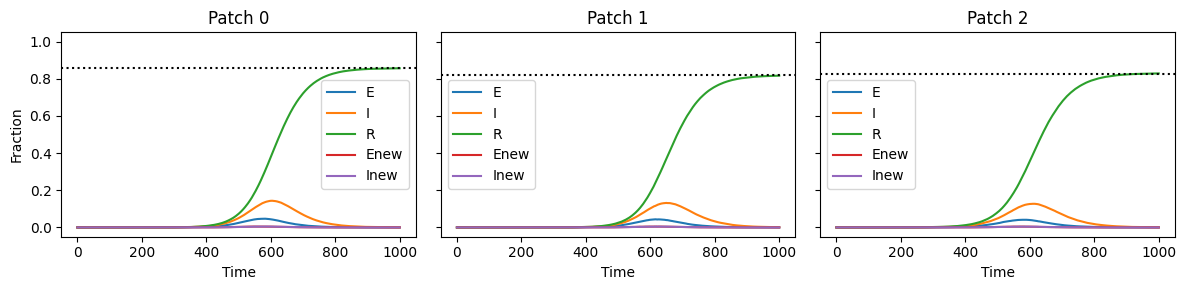

In [6]:
start = time()

Npatch = 3

commuting = np.where(np.eye(Npatch).astype(bool), 1, rng.rng.random(size=(Npatch,Npatch))/Npatch**2)
display(pd.DataFrame(commuting))

tmax = 1000

params = pd.DataFrame()
params["N"] = rng.rng.integers(1e5, 1e6, size=Npatch, endpoint=True, dtype="u4")
params["beta"] = np.full(Npatch, 0.06)
params["epsilon"] = np.full(Npatch, 0.1)
params["mu"] = np.full(Npatch, 0.03)
params["I0"] = np.where([True,False,True], np.full(Npatch, 2), 0).astype("u4")
params.index.name = "Patch"
display(params)

reps = 5
for i in range(reps):
    result = kernel(rng, tmax, params, commuting)

end = time()
print(f"Duration per replica: {np.round((end-start)/5, 2)} sec")

params["R0"] = commuting @ (params["beta"] / params["mu"])

fig, axs = plt.subplots(1,3,figsize=(12,3),sharey=True)
for i in range(min(Npatch,len(axs))):
	result[i].drop("S", axis=1).plot(ax=axs[i])
	axs[i].set_title(f"Patch {i}")
	axs[i].set_xlabel("Time")
	axs[i].set_ylabel("Fraction")
	Rinf = root_scalar(Rinf_equation, args=(params["R0"][i],1-params["I0"][i]/params["N"][i]), x0=params["R0"][i]).root
	axs[i].axhline(Rinf, color="k", linestyle=":")
	axs[i].set_ylim([-0.05,1.05])
fig.tight_layout()

,0,1,2
0,1.000000,0.028058,0.027698
1,0.091833,1.000000,0.052398
2,0.021020,0.001383,1.000000


,N,beta,epsilon,mu,I0
Patch,,,,,
0,727979,0.06,0.1,0.03,2
1,403504,0.06,0.1,0.03,0
2,652183,0.06,0.1,0.03,2


Duration per replica: 0.03 sec


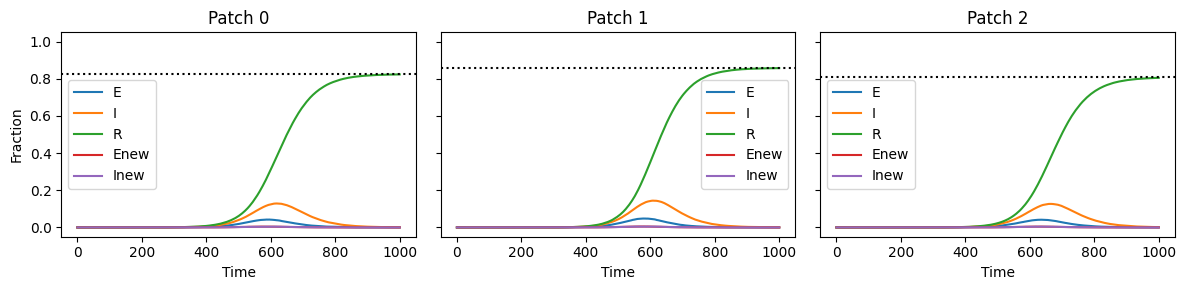

In [7]:
start = time()

Npatch = 3

commuting = np.where(np.eye(Npatch).astype(bool), 1, rng.rng.random(size=(Npatch,Npatch))/Npatch**2)
display(pd.DataFrame(commuting))

tmax = 1000

params = pd.DataFrame()
params["N"] = rng.rng.integers(1e5, 1e6, size=Npatch, endpoint=True, dtype="u4")
params["beta"] = np.full(Npatch, 0.06)
params["epsilon"] = np.full(Npatch, 0.1)
params["mu"] = np.full(Npatch, 0.03)
params["I0"] = np.where([True,False,True], np.full(Npatch, 2), 0).astype("u4")
params.index.name = "Patch"
display(params)

reps = 5
for i in range(reps):
    result = kernel(rng, tmax, params, commuting)

end = time()
print(f"Duration per replica: {np.round((end-start)/5, 2)} sec")

params["R0"] = commuting @ (params["beta"] / params["mu"])

fig, axs = plt.subplots(1,3,figsize=(12,3),sharey=True)
for i in range(min(Npatch,len(axs))):
	result[i].drop("S", axis=1).plot(ax=axs[i])
	axs[i].set_title(f"Patch {i}")
	axs[i].set_xlabel("Time")
	axs[i].set_ylabel("Fraction")
	Rinf = root_scalar(Rinf_equation, args=(params["R0"][i],1-params["I0"][i]/params["N"][i]), x0=params["R0"][i]).root
	axs[i].axhline(Rinf, color="k", linestyle=":")
	axs[i].set_ylim([-0.05,1.05])
fig.tight_layout()